In [4]:
# install the main library YFinance
%pip install yfinance
%pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [89]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

# List of S&P 500 companies

https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

In [ ]:
# Web Scraping for List of S&P 500 companies
import requests
from bs4 import BeautifulSoup


url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

response = requests.get(url, headers=headers)

In [ ]:
# Check if the request was successful (status code 200)
if response.status_code == 200:
    soup = BeautifulSoup(response.content, "html.parser")
    table_div = soup.find("div", class_="mw-content-ltr")

    table = table_div.find("table")

    # Use pandas to read the table into a DataFrame
    df = pd.read_html(str(table))[0]

    # Display the DataFrame
    print(df)
else:
    print("Failed to retrieve data from the webpage.")

    Symbol             Security             GICS Sector  \
0      MMM                   3M             Industrials   
1      AOS          A. O. Smith             Industrials   
2      ABT  Abbott Laboratories             Health Care   
3     ABBV               AbbVie             Health Care   
4      ACN            Accenture  Information Technology   
..     ...                  ...                     ...   
498    XYL           Xylem Inc.             Industrials   
499    YUM          Yum! Brands  Consumer Discretionary   
500   ZBRA   Zebra Technologies  Information Technology   
501    ZBH        Zimmer Biomet             Health Care   
502    ZTS               Zoetis             Health Care   

                                GICS Sub-Industry    Headquarters Location  \
0                        Industrial Conglomerates    Saint Paul, Minnesota   
1                               Building Products     Milwaukee, Wisconsin   
2                           Health Care Equipment  North 

/var/folders/94/c9w07ypn0s31_b9lsdglwwnw0000gn/T/ipykernel_23122/641151213.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]  # Assuming there's only one table, otherwise, loop through the list


In [ ]:
df

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [ ]:
# # of companies per GICS Sector
df['GICS Sector'].value_counts()

GICS Sector
Industrials               78
Financials                73
Information Technology    69
Health Care               60
Consumer Discretionary    51
Consumer Staples          38
Utilities                 31
Real Estate               31
Materials                 26
Communication Services    23
Energy                    23
Name: count, dtype: int64

In [ ]:
# top 10 companies by date added
df.sort_values('Date added', ascending=False).head(10)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
114,COIN,Coinbase,Financials,Financial Exchanges & Data,"New York City, New York",2025-05-19,1679788,2012
151,DASH,DoorDash,Consumer Discretionary,Specialized Consumer Services,"San Francisco, California",2025-03-24,1792789,2012
182,EXE,Expand Energy,Energy,Oil & Gas Exploration & Production,"Oklahoma City, Oklahoma",2025-03-24,895126,1989
446,TKO,TKO Group Holdings,Communication Services,Movies & Entertainment,"New York City, New York",2025-03-24,1973266,2023
492,WSM,"Williams-Sonoma, Inc.",Consumer Discretionary,Homefurnishing Retail,"San Francisco, California",2025-03-24,719955,1956
38,APO,Apollo Global Management,Financials,Asset Management & Custody Banks,"New York City, New York",2024-12-23,1858681,1990
287,LII,Lennox International,Industrials,Building Products,"Richardson, Texas",2024-12-23,1069202,1895
495,WDAY,"Workday, Inc.",Information Technology,Application Software,"Pleasanton, California",2024-12-23,1327811,2005
442,TPL,Texas Pacific Land Corporation,Energy,Oil & Gas Exploration & Production,"Dallas, Texas",2024-11-26,1811074,1888
175,ERIE,Erie Indemnity,Financials,Insurance Brokers,"Erie, Pennsylvania",2024-09-23,922621,1925


In [ ]:
# top 10 states by # of companies
df['State'] = df['Headquarters Location'].str.extract(r',\s*([A-Z]{2})$')
df['State'].value_counts().head(10)

In [ ]:
# companies founded before 1900
df[df['Founded'].astype(str).str.extract(r'(\d{4})').astype(float)[0] < 1900]



,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded,State
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888,NaN
26,AXP,American Express,Financials,Consumer Finance,"New York City, New York",1976-06-30,4962,1850,NaN
29,AWK,American Water Works,Utilities,Water Utilities,"Camden, New Jersey",2016-03-04,1410636,1886,NaN
30,AMP,Ameriprise Financial,Financials,Asset Management & Custody Banks,"Minneapolis, Minnesota",2005-10-03,820027,1894,NaN
46,AIZ,Assurant,Financials,Multi-line Insurance,"Atlanta, Georgia",2007-04-10,1267238,1892,NaN
...,...,...,...,...,...,...,...,...,...
450,TRV,Travelers Companies (The),Financials,Property & Casualty Insurance,"New York City, New York",2002-08-21,86312,1853,NaN
452,TFC,Truist Financial,Financials,Diversified Banks,"Charlotte, North Carolina",1997-12-04,92230,1872,NaN
459,UNP,Union Pacific Corporation,Industrials,Rail Transportation,"Omaha, Nebraska",1957-03-04,100885,1862,NaN
486,WEC,WEC Energy Group,Utilities,Electric Utilities,"Milwaukee, Wisconsin",2008-10-31,783325,1896,NaN


In [28]:
fig = px.bar(df['GICS Sub-Industry'].value_counts().head(10))
fig.show()

In [36]:
df_additions = df[['Symbol', 'Security', 'Date added']].copy()

In [38]:
df_additions['Year added'] = pd.to_datetime(df_additions['Date added']).dt.year

In [40]:
df_additions['Year added'].value_counts().sort_values(ascending=False)

Year added
1957    53
2017    23
2016    23
2019    22
2008    17
2022    16
2024    16
2023    15
2021    15
2012    14
1997    14
2015    14
2018    14
2002    13
2009    12
2020    12
2007    12
1998    11
1976    11
2013    10
2006    10
2011    10
2000     9
1999     9
2010     9
2001     8
2014     8
1995     7
1985     7
2005     7
1994     7
2004     6
1982     5
1989     5
2025     5
1984     5
2003     5
1988     4
1981     3
1992     3
1980     3
1983     3
1993     3
1986     3
1972     2
1987     2
1969     2
1996     2
1965     2
1973     2
1975     2
1970     2
1979     2
1974     1
1991     1
1964     1
1978     1
Name: count, dtype: int64

In [48]:

mask = df_additions['Year added'] == 1957
# select all rows except the ones that contain '1957'
df_additions = df_additions[~mask]

df_additions['Year added'].value_counts().sort_values(ascending=False)



Year added
2017    23
2016    23
2019    22
2008    17
2022    16
2024    16
2021    15
2023    15
2012    14
2018    14
2015    14
1997    14
2002    13
2007    12
2009    12
2020    12
1976    11
1998    11
2006    10
2013    10
2011    10
2000     9
2010     9
1999     9
2014     8
2001     8
2005     7
1994     7
1985     7
1995     7
2004     6
2003     5
2025     5
1989     5
1982     5
1984     5
1988     4
1986     3
1992     3
1980     3
1993     3
1983     3
1981     3
1972     2
1973     2
1970     2
1975     2
1965     2
1996     2
1969     2
1987     2
1979     2
1991     1
1974     1
1964     1
1978     1
Name: count, dtype: int64

# 2 [Macro] Indexes YTD (as of 1 May 2025)

In [51]:
start = date(2025, 1, 1)
end = date(2025, 5, 1)

print(f'Period for indexes: {start} to {end} ')

Period for indexes: 2025-01-01 to 2025-05-01 


In [104]:

index_info = {
    'United States': '^GSPC',
    'China': '000001.SS',
    'Hong Kong': '^HSI',
    'Australia': '^AXJO',
    'India': '^NSEI',
    'Canada': '^GSPTSE',
    'Germany': '^GDAXI',
    'United Kingdom': '^FTSE',
    'Japan': '^N225',
    'Mexico': '^MXX',
    'Brazil': '^BVSP'
}



In [112]:
# Create an empty dictionary to store data
ytd_returns = {}

for country, ticker in index_info.items():
    ticker_obj = yf.Ticker(ticker)
    df = ticker_obj.history(start=start, end=end, interval="1d")
    
    if not df.empty:
        # Usa solo la colonna Close
        close_prices = df['Close'].dropna()
        if not close_prices.empty:
            start_price = close_prices.iloc[0]
            end_price = close_prices.iloc[-1]
            ytd = (end_price / start_price - 1) * 100
            ytd_returns[country] = ytd


# Convert dictionary to DataFrame and sort by YTD Return (%) 
ytd_df = pd.DataFrame.from_dict(ytd_returns, orient='index', columns=['YTD Return (%)'])
ytd_df = ytd_df.sort_values(by='YTD Return (%)', ascending=False)

print(ytd_df)

# Confronta con S&P500
sp500_return = ytd_returns.get('United States', None)
if sp500_return is not None:
    better_than_sp500 = (ytd_df['YTD Return (%)'] > sp500_return).sum()
    print(f"Number of indexes with better YTD return than S&P500: {better_than_sp500}")
else:
    print("S&P500 data not available for comparison.")


                YTD Return (%)
Mexico               13.049444
Hong Kong            12.720018
Brazil               12.438710
Germany              12.346378
United Kingdom        2.842590
India                 2.490424
China                 0.504817
Canada               -0.226126
Australia            -0.914500
United States        -5.103301
Japan                -8.297931
Number of indexes with better YTD return than S&P500: 9


# [Index] S&P 500 Market Corrections Analysis

In [23]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(1950, 1, 30)
print(f'Period for indexes: {start} to {end} ')


Year = 2025; month= 5; day=25
Period for indexes: 1950-01-30 to 2025-05-25 


In [24]:

# Download S&P 500 data
ticker_obj = yf.Ticker("^GSPC")
sp500_daily = ticker_obj.history(start = start, end = end)

sp500_daily.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-05-12 00:00:00-04:00,5807.200195,5845.370117,5786.080078,5844.189941,6014580000,0.0,0.0
2025-05-13 00:00:00-04:00,5854.149902,5906.640137,5845.020020,5886.549805,5516290000,0.0,0.0
2025-05-14 00:00:00-04:00,5896.740234,5906.549805,5872.109863,5892.580078,5233450000,0.0,0.0
2025-05-15 00:00:00-04:00,5869.819824,5924.209961,5865.160156,5916.930176,4991290000,0.0,0.0
2025-05-16 00:00:00-04:00,5929.089844,5958.620117,5907.359863,5958.379883,4850850000,0.0,0.0
2025-05-19 00:00:00-04:00,5902.879883,5968.609863,5895.689941,5963.600098,4144010000,0.0,0.0
2025-05-20 00:00:00-04:00,5944.660156,5953.060059,5909.259766,5940.459961,4416850000,0.0,0.0
2025-05-21 00:00:00-04:00,5910.180176,5938.370117,5830.910156,5844.609863,5254250000,0.0,0.0
2025-05-22 00:00:00-04:00,5841.259766,5878.080078,5825.819824,5842.009766,5157050000,0.0,0.0


<Axes: xlabel='Date'>

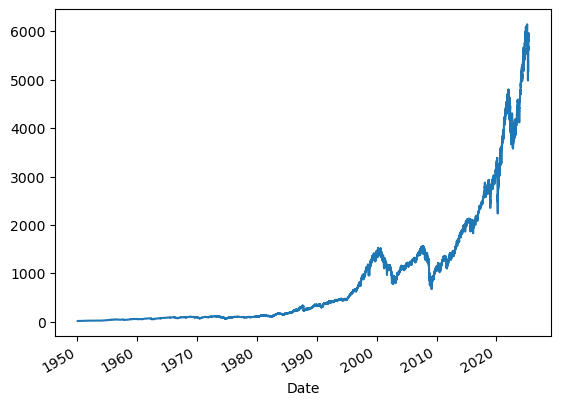

In [25]:
sp500_daily['Close'].plot.line()

In [54]:
sp500_daily['Peak'] = sp500_daily['Close'].cummax()
sp500_daily['Drawdown'] = (sp500_daily['Close'] / sp500_daily['Peak'] - 1) * 100

sp500_daily['InCorrection'] = sp500_daily['Drawdown'] < -5

sp500_daily['Correction Shift'] = sp500_daily['InCorrection'].shift(1, fill_value=False)
sp500_daily['Correction Change'] = sp500_daily['InCorrection'] != sp500_daily['Correction Shift']
sp500_daily['Correction Group'] = sp500_daily['Correction Change'].cumsum()

corrections = sp500_daily[sp500_daily['InCorrection']]

correction_starts = corrections.groupby('Correction Group').apply(lambda x: x.index.min())

correction_durations = []

for group, start_date in correction_starts.items():
    # Find previous ATH before correction started
    previous_ath = sp500_daily.loc[:start_date]['Peak'].iloc[-1]
    
    # Correction ends when Close >= previous ATH
    recovery_period = sp500_daily.loc[start_date:]
    recovery_date = recovery_period[recovery_period['Close'] >= previous_ath].index.min()
    
    if pd.notnull(recovery_date):
        duration = (recovery_date - start_date).days + 1
        correction_durations.append(duration)


correction_durations_series = pd.Series(correction_durations)

median_duration = correction_durations_series.median()
print("Median Correction Duration (peak to recovery, days):", median_duration)

Median Correction Duration (peak to recovery, days): 89.0


/var/folders/94/c9w07ypn0s31_b9lsdglwwnw0000gn/T/ipykernel_42772/519348409.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correction_starts = corrections.groupby('Correction Group').apply(lambda x: x.index.min())


# [Stocks] Earnings Surprise Analysis for Amazon (AMZN)

In [126]:
# Replace 'ha1_Amazon.csv' with your actual filename if needed
earnings_df = pd.read_csv(
    "ha1_Amazon.csv",
    sep=';',
    encoding='utf-8'
)

print(earnings_df.head(10))

  Symbol           Company                 Earnings Date EPS Estimate  \
0   AMZN    Amazon.com Inc    April 29, 2026 at 6 AM EDT            -   
1   AMZN    Amazon.com Inc  February 4, 2026 at 4 PM EST            -   
2   AMZN    Amazon.com Inc  October 29, 2025 at 6 AM EDT            -   
3   AMZN    Amazon.com Inc     July 30, 2025 at 4 PM EDT            -   
4   AMZN  Amazon.com, Inc.       May 1, 2025 at 4 PM EDT       ???.36   
5   AMZN  Amazon.com, Inc.  February 6, 2025 at 4 PM EST       ???.49   
6   AMZN  Amazon.com, Inc.  October 31, 2024 at 4 PM EDT       ???.14   
7   AMZN  Amazon.com, Inc.    August 1, 2024 at 4 PM EDT       01.???   
8   AMZN  Amazon.com, Inc.    April 30, 2024 at 4 PM EDT         0.83   
9   AMZN  Amazon.com, Inc.  February 1, 2024 at 4 PM EST          0.8   

  Reported EPS Surprise (%)  
0            -            -  
1            -            -  
2            -            -  
3            -            -  
4       ???.59       +16.74  
5       ???.86  

In [127]:

earnings_df.columns = earnings_df.columns.str.lower()
earnings_df.columns = earnings_df.columns.str.replace(' ', '_')

print(earnings_df.head())

  symbol           company                 earnings_date eps_estimate  \
0   AMZN    Amazon.com Inc    April 29, 2026 at 6 AM EDT            -   
1   AMZN    Amazon.com Inc  February 4, 2026 at 4 PM EST            -   
2   AMZN    Amazon.com Inc  October 29, 2025 at 6 AM EDT            -   
3   AMZN    Amazon.com Inc     July 30, 2025 at 4 PM EDT            -   
4   AMZN  Amazon.com, Inc.       May 1, 2025 at 4 PM EDT       ???.36   

  reported_eps surprise_(%)  
0            -            -  
1            -            -  
2            -            -  
3            -            -  
4       ???.59       +16.74  


In [128]:

cols_to_convert = ['eps_estimate', 'reported_eps', 'surprise_(%)']
for col in cols_to_convert:
    earnings_df[col] = pd.to_numeric(earnings_df[col], errors='coerce')

print(earnings_df.head())

  symbol           company                 earnings_date  eps_estimate  \
0   AMZN    Amazon.com Inc    April 29, 2026 at 6 AM EDT           NaN   
1   AMZN    Amazon.com Inc  February 4, 2026 at 4 PM EST           NaN   
2   AMZN    Amazon.com Inc  October 29, 2025 at 6 AM EDT           NaN   
3   AMZN    Amazon.com Inc     July 30, 2025 at 4 PM EDT           NaN   
4   AMZN  Amazon.com, Inc.       May 1, 2025 at 4 PM EDT           NaN   

   reported_eps  surprise_(%)  
0           NaN           NaN  
1           NaN           NaN  
2           NaN           NaN  
3           NaN           NaN  
4           NaN         16.74  


In [129]:

# normalize company names
earnings_df["company"] = earnings_df["company"].str.replace(",", "").str.strip()

# convert earnings date to datetime
earnings_df['earnings_date'] = earnings_df['earnings_date'].str.split(' at').str[0]
earnings_df['earnings_date'] = pd.to_datetime(earnings_df['earnings_date'], errors='coerce')

earnings_df.head()

,symbol,company,earnings_date,eps_estimate,reported_eps,surprise_(%)
0,AMZN,Amazon.com Inc,2026-04-29,NaN,NaN,NaN
1,AMZN,Amazon.com Inc,2026-02-04,NaN,NaN,NaN
2,AMZN,Amazon.com Inc,2025-10-29,NaN,NaN,NaN
3,AMZN,Amazon.com Inc,2025-07-30,NaN,NaN,NaN
4,AMZN,Amazon.com Inc.,2025-05-01,NaN,NaN,16.74


In [130]:

# Filter positive surprises
pos_sur_earnings_df=earnings_df[earnings_df['surprise_(%)'].astype(float)>0]
pos_sur_earnings_df.head()

,symbol,company,earnings_date,eps_estimate,reported_eps,surprise_(%)
4,AMZN,Amazon.com Inc.,2025-05-01,NaN,NaN,16.74
5,AMZN,Amazon.com Inc.,2025-02-06,NaN,NaN,24.47
6,AMZN,Amazon.com Inc.,2024-10-31,NaN,NaN,25.17
7,AMZN,Amazon.com Inc.,2024-08-01,NaN,NaN,22.58
8,AMZN,Amazon.com Inc.,2024-04-30,0.83,0.98,17.91


In [131]:

amzn_daily_df = yf.download(
    'amzn',
    start='1950-01-01',
    end=date.today().strftime('%Y-%m-%d')
).reset_index()

amzn_daily_df.columns = amzn_daily_df.columns.droplevel(1)
amzn_daily_df['Date'] = pd.to_datetime(amzn_daily_df['Date'], errors='coerce')

amzn_daily_df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
0,1997-05-15,0.097917,0.125000,0.096354,0.121875,1443120000
1,1997-05-16,0.086458,0.098958,0.085417,0.098438,294000000
2,1997-05-19,0.085417,0.088542,0.081250,0.088021,122136000
3,1997-05-20,0.081771,0.087500,0.081771,0.086458,109344000
4,1997-05-21,0.071354,0.082292,0.068750,0.081771,377064000


Price,Date,Close,High,Low,Open,Volume,two_day_pct_change
0,1997-05-15,0.097917,0.125000,0.096354,0.121875,1443120000,-0.127659
1,1997-05-16,0.086458,0.098958,0.085417,0.098438,294000000,-0.054211
2,1997-05-19,0.085417,0.088542,0.081250,0.088021,122136000,-0.164639
3,1997-05-20,0.081771,0.087500,0.081771,0.086458,109344000,-0.146494
4,1997-05-21,0.071354,0.082292,0.068750,0.081771,377064000,0.051097


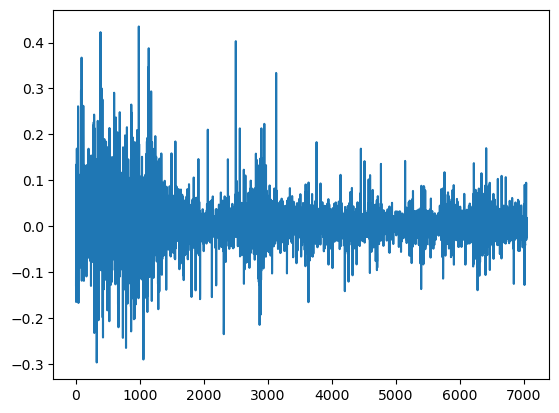

In [132]:
# Calculate 2-day percentage change
amzn_daily_df['two_day_pct_change'] = amzn_daily_df['Close'].shift(-2) / amzn_daily_df['Close'] - 1
amzn_daily_df['two_day_pct_change'].plot()

amzn_daily_df.head()

In [133]:

# Filter earnings with positive reported EPS or positive surprise
amazon_earnings_positive = earnings_df[(earnings_df['reported_eps'] > earnings_df['eps_estimate']) | (earnings_df['surprise_(%)'] > 0)]

amazon_earnings_positive

,symbol,company,earnings_date,eps_estimate,reported_eps,surprise_(%)
4,AMZN,Amazon.com Inc.,2025-05-01,NaN,NaN,16.74
5,AMZN,Amazon.com Inc.,2025-02-06,NaN,NaN,24.47
6,AMZN,Amazon.com Inc.,2024-10-31,NaN,NaN,25.17
7,AMZN,Amazon.com Inc.,2024-08-01,NaN,NaN,22.58
8,AMZN,Amazon.com Inc.,2024-04-30,0.83,0.98,17.91
...,...,...,...,...,...,...
111,AMZN,Amazon.com Inc.,1998-07-22,NaN,NaN,1.34
112,AMZN,Amazon.com Inc.,1998-04-27,NaN,NaN,13.92
113,AMZN,Amazon.com Inc.,1998-01-22,NaN,NaN,11.41
114,AMZN,Amazon.com Inc.,1997-10-27,NaN,NaN,13.29


In [134]:

# Merge earnings with daily stock prices
amazon_positive = pd.merge(amzn_daily_df, 
                           amazon_earnings_positive[["earnings_date", "surprise_(%)"]], 
                           left_on = 'Date', 
                           right_on='earnings_date', 
                           how='inner')

amazon_positive.head()



,Date,Close,High,Low,Open,Volume,two_day_pct_change,earnings_date,surprise_(%)
0,1997-07-10,0.128125,0.128646,0.116667,0.116667,181032000,-0.166665,1997-07-10,13.33
1,1997-10-27,0.213542,0.250521,0.211458,0.240104,121824000,0.262192,1997-10-27,13.29
2,1998-01-22,0.256771,0.263542,0.251042,0.253646,189432000,-0.062881,1998-01-22,11.41
3,1998-04-27,0.344792,0.352604,0.321354,0.347396,377712000,0.154078,1998-04-27,13.92
4,1998-07-22,1.116667,1.165625,1.087500,1.116667,559488000,-0.072761,1998-07-22,1.34


In [136]:

amazon_positive['two_day_pct_change'].describe()

count    86.000000
mean      0.019558
std       0.124346
min      -0.281971
25%      -0.070554
50%       0.002672
75%       0.106222
max       0.402905
Name: two_day_pct_change, dtype: float64

In [ ]:
# Calculate 2-day percentage change median
amazon_positive['two_day_pct_change'].median()

0.002672266474036067

In [143]:
# Calculate 2-day percentage change median
amzn_daily_df['two_day_pct_change'].median()

0.0016375198550677705